## Performance Tests

---
---

# Concurrency Test

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import requests
import random
import time
from concurrent.futures import ThreadPoolExecutor

import matplotlib.pyplot as plt

#### List of search terms

In [42]:

SEARCH_TERMS = [
"apple",
"banana",
"cherry",
"date",
"fig",
"grape",
"kiwi",
"lemon",
"mango",
"orange",
"pear",
"raspberry",
"strawberry",
"tangerine",
"watermelon",

"avocado",
"black beans",
"chickpeas",
"corn",
"lentils",
"mushrooms",
"olives",
"peas",
"quinoa",
"kale",
"spinach",
"aspargus",
"broccoli",
"carrots",
"cauliflower",
"celery",
"cucumber",
"zucchini",
"cabbage",
"peppers",

"milk",
"oat milk",
"almond milk",
"soy milk",
"coconut milk",
"rice milk",
"cashew milk",

"cottage cheese",
"cheddar cheese",
"mozzarella cheese",
"parmesan cheese",
"swiss cheese",
"blue cheese",
"brie cheese",
"cream cheese",
"ricotta cheese",

"lamb mince",
"beef mince",
"pork mince",
"chicken mince",
"turkey mince",

"cod",
"salmon",
"tuna",
"trout",
"mackerel",
"anchovies",
"prawns",
"shrimp",
"crab",
"lobster",
"clams",
"mussels",
"oysters",

"basil",
"cinnamon",
"coriander",
"cumin",
"curry",
"garlic",
"ginger",
"oregano",
"paprika",
"parsley",
"rosemary",
"sage",
"thyme",
"turmeric",
"vanilla",
"bay leaves",
"chili",

"almonds",
"cashews",
"peanuts",
"walnuts",
"pistachios",
"pecans",
"macadamia",
"hazelnuts",
"sunflower seeds",
"pumpkin seeds",
"chia seeds",
"flax seeds",
"sesame seeds",

"flour",
"butter",
"yeast",
"sugar",
"salt",
"cheese",
"ham",
"water",
"mozarrella",

"sausages",
"mushrooms",
"onions",
"tomatoes",
"eggs" "eggs",
"sweetchili sauce",

"beef patties",
"lettuce",
"burger buns",
"pickles",
"sliced cheddar cheese",
"tomato ketchup",
"mayonnaise",

"oats",
"flax seeds",
"chia seeds",
"almond milk",
"dried raisins",

"potatoes",
"steak",

"green tea",
"lemons",
"honey",

"chicken",
"torilla wraps",
"lettuce",
"tomatoes",
"onions",
"cheese",
"mayonnaise",
"barbecue sauce",

"whiskey",
"sugar cubes",
"angostura bitters",

"gin",
"tonic water",
"lemon",

"vodka",
"cranberry juice",

"rum",
"orange juice",

"tequila",
"fresh mint leaves",
"lime",
"agave syrup",

"white rum",
"pineapple juice",
"coconut cream",
"whole pineapple",

"marshmallows",
"chocolare biscuits",

"beer",
"lager",
"ale",
"stout",
"pilsner",
"ipa",
"pale ale",
"porter",

"red wine",
"white wine",
"rose wine",
"champagne",
"prosecco",

]

#### Test Logic

In [43]:
# Define the increments for the number of requests
increments = [20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400]

def make_request(search_term):
    url = f"http://localhost:9999/api/search?search_term={search_term}"
    response = requests.get(url)
    return response.status_code

def execute_requests(n):
    if n > len(SEARCH_TERMS):
        number_of_extra_search_terms = n - len(SEARCH_TERMS)
        extra_search_terms = random.sample(SEARCH_TERMS, number_of_extra_search_terms)
        SEARCH_TERMS.extend(extra_search_terms)

    selected_terms = random.sample(SEARCH_TERMS, n)
    with ThreadPoolExecutor(max_workers=n) as executor:
        future_to_term = {executor.submit(make_request, term): term for term in selected_terms}
        for future in future_to_term:
            term = future_to_term[future]
            try:
                status = future.result()
                # print(f"Request for '{term}' completed with status code {status}")
            except Exception as exc:
                print(f"Request for '{term}' generated an exception: {exc}")

dictionary = {}

def main():
    for num_requests in increments:
        start_time = time.time()
        
        execute_requests(num_requests)
        
        end_time = time.time()
        duration_ms = (end_time - start_time) * 1000
        
        duration_seconds = duration_ms / 1000
        dictionary[num_requests] = duration_seconds


if __name__ == "__main__":
    main()

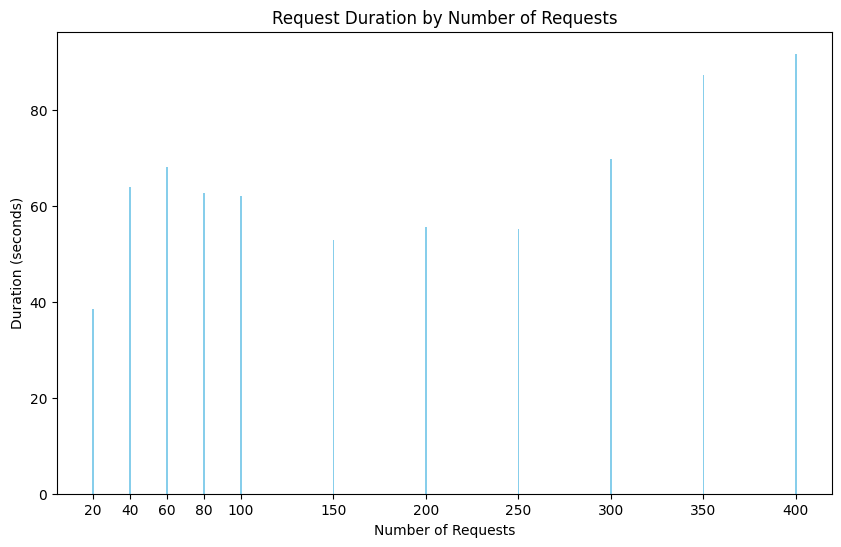

In [46]:

keys = list(dictionary.keys())
duration_values = list(dictionary.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(keys, duration_values, color='skyblue')
plt.xlabel('Number of Requests')
plt.ylabel('Duration (seconds)')
plt.title('Request Duration by Number of Requests')
plt.xticks(keys)
plt.show()

---
---

#